<a href="https://colab.research.google.com/github/aabhassenapati/IvyHacks2020/blob/patch-1/Lung_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

In [ ]:
!pip install pyaudio

  Created wheel for pyaudio: filename=PyAudio-0.2.11-cp36-cp36m-linux_x86_64.whl size=51618 sha256=c50d1ea38947eb67c561fb0caea41007f286ad0ff805e8221aaafe9f629ae857
  Stored in directory: /root/.cache/pip/wheels/f4/a8/a4/292214166c2917890f85b2f72a8e5f13e1ffa527c4200dcede
Successfully built pyaudio


In [ ]:
!pip install pydub

##Installing latex

In [ ]:
! sudo apt-get install texlive-latex-recommended
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

In [ ]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 10, # fontsize for x and y labels (was 10)
              'axes.titlesize': 10,
              'font.size': 10, # was 10
              'legend.fontsize': 10, # was 10
              'xtick.labelsize': 10,
              'ytick.labelsize': 10,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif',
              'legend.title_fontsize' : '12'
              #'title_fontsize' : '16'

    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

##Lung volume

In [ ]:
from scipy.io import wavfile
import scipy.signal as sps
new_rate = 2000
sampling_rate, data = wavfile.read('1.wav')
plt.plot(data)
print(data[44100])
print(len(data))
number_of_samples = round(len(data) * float(new_rate) / sampling_rate)
data = sps.resample(data, number_of_samples)
plt.plot(data)
print(data[2000])
len(data)

FileNotFoundError: ignored

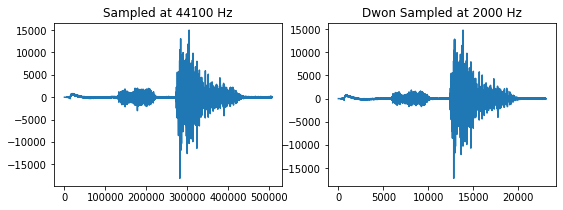

In [ ]:
sampling_rate, data = wavfile.read('lung_sample.wav')
down_sample = data[::22]
fig, ax = plt.subplots(1,2, figsize=(9,3))
ax[0].plot(data)
ax[0].title.set_text('Sampled at 44100 Hz')
ax[1].plot(down_sample)
ax[1].title.set_text('Dwon Sampled at 2000 Hz')

In [ ]:
from scipy import stats
stats.ttest_ind(data,down_sample, equal_var = False)

Ttest_indResult(statistic=0.09024839890369087, pvalue=0.9280905409631666)

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio
import pyaudio
import wave
import threading,time
from scipy import signal
import scipy
import sys
from scipy.io import wavfile
from scipy.signal import butter, lfilter, filtfilt
from pydub import AudioSegment as am

In [ ]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data,axis = 0)
    return y

In [ ]:
def calc_non_silence(audio, fs, sil_threshold=0.05, win_size=0.25, ret="sec"):
    """Calculates total non - silence length in this audio file.

    Keywords:
        audio:          location of the audiofile OR a (samplerate, audiodata) tuple
        sil_threshold:  percentage of the maximum window-averaged amplitude
                        below which audio is considered silent
        win_size:       length of window in sec (audio is cut into windows)
        ret:            the return type; can be one of the following:
                        - "sec": return the number of silent seconds
                        - "frac": return the frac of silence (between 0 and 1)
                        - "amp": return a list of amplitude values (one for each window)
                        - "issil": return an np-array of 0s and 1s (1=silent) for each window
                        - "chunk": return a list of (start, end, is_silent) tuples,
                            with start and end in seconds and is_silent is a boolean"""
    
    """ if isinstance(audio, tuple):
        samplerate, data = audio
    else:
        # read the sample rate and data from the wave file
        samplerate, data = wavfile.read(audio)"""
    
    data = audio
    samplerate = fs
    
    win_frames = int(samplerate * win_size) # number of samples in a window
    win_amps = [] # windows in which to measure amplitude

    for win_start in np.arange(0, len(data), win_frames):
        # Find the end of the window
        win_end = min(win_start + win_frames, len(data))
        # Add the mean amplitude for this frame to the list of window amplitudes
        win_amps.append(np.nanmean(np.abs(data[win_start:win_end])))
        
    # Calculate the minimum threshold for a window to be non-silent
    threshold = sil_threshold * max(win_amps)

    # Find the windows that are non-silent
    sils, = np.where(win_amps >= threshold)

    # The silence length is the number of non-silent windows times the window length
    sil = len(sils) * win_size

    if ret == "sec":
        return sil
    elif ret == "frac":
        return len(sils) / len(win_amps)
    elif ret == "amp":
        return win_amps
    elif ret == "issil":
        return (win_amps >= threshold).astype(int)
    elif ret == "chunk":
        chunks = []
        t0, t1 = 0, 0
        is_sil = win_amps[0] >= threshold
        for wi, amp in enumerate(win_amps):
            winsil = amp >= threshold
            if winsil == is_sil:
                t1 = (wi + 1) * win_size
            else:
                chunks.append((t0*win_size, t1*win_size, is_sil))
                t0 = (wi + 1) * win_size
                is_sil = not is_sil
        chunks.append((t0*win_size, len(win_amps)*win_size, is_sil))
        return chunks
    else:
        raise ValueError("Unknown return format: {}".format(ret))

Downsampling the WAV file

In [ ]:
file = 'lung_sample.wav'
fs = 2000
sound = am.from_file(file, format='wav', frame_rate=44100)
sound = sound.set_frame_rate(fs)
sound.export('test.wav', format='wav')

<_io.BufferedRandom name='test.wav'>

484748


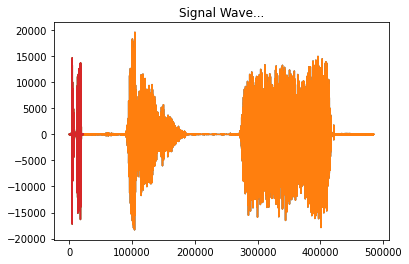

In [ ]:
#samplerate, sig = wavfile.read('1.wav')
import librosa    
y, s = librosa.load('1.wav', sr=2000) # Downsample 44.1kHz to 8kHz
fs = 2000
plt.title("Signal Wave...")
plt.plot(sig)
print(len(sig))
y = butter_highpass_filter(down_sample, 40 ,fs, 5) 
plt.plot(y)

In [ ]:
t = calc_non_silence(y, 2000)
t

5.25

In [ ]:
from sklearn.preprocessing import normalize
from itertools import chain

energy = calc_non_silence(y, fs, ret = "amp")
norm = np.linalg.norm(energy) ## normalize in 0-1
norm_e = energy/norm
e = np.sum(np.abs(norm_e) ** 2.0)  ## summation of square of amplitude
e

1.0

In [ ]:
a = 23   ## age in years
h = 67.6  ## height in inches

FVC_m = (0.15*e)*((0.1524)*h - (0.0214)*a - 4.65)*t
FVC_f = (0.15*e)*((0.1247)*h - (0.0216)*a - 3.59)*t

print("FVC_m(in Litres): ",FVC_m)
print("FVC_f(in Litres): ",FVC_f)

FVC_m(in Litres):  4.063531499999999
FVC_f(in Litres):  3.4200494999999993


Generated a random number array of number b/w 0 and 1.
e1 = energy in time domain
e2 = energy in freq. domain by calculating FFT, taking IFT and then energy

In [ ]:
import numpy as np
import numpy.fft as nf

x = []
for i in range (0, 100):
  x.append(np.random.rand())
x = np.array(x)

In [ ]:
e1 = sum(abs(x)**2.0)
e1

31.00205081641105

In [ ]:
fft = nf.fft(x)
inv_fft = nf.ifft(fft)
e2 = sum(abs(inv_fft)**2.0)
e2

31.00205081641105

##Hilbert Transform

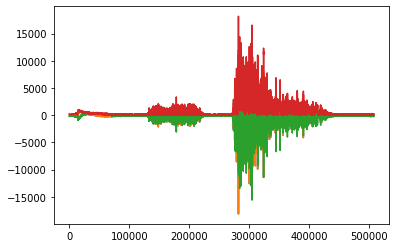

In [ ]:
from scipy.signal import hilbert
import numpy as np

sensor = signal
plt.plot(sensor)

analytical_signal = hilbert(sensor)

plt.plot(analytical_signal.real)
plt.plot(analytical_signal.imag)

amplitude_envelope = np.abs(analytical_signal)
plt.plot(amplitude_envelope)


##For silence

In [ ]:
import numpy as np
from scipy.io import wavfile

def calc_silence(audio, sil_threshold=0.03, win_size=0.25, ret="chunk"):
    """Calculates total silence length in this audio file.

    Keywords:
        audio:          location of the audiofile OR a (samplerate, audiodata) tuple
        sil_threshold:  percentage of the maximum window-averaged amplitude
                        below which audio is considered silent
        win_size:       length of window in sec (audio is cut into windows)
        ret:            the return type; can be one of the following:
                        - "sec": return the number of silent seconds
                        - "frac": return the frac of silence (between 0 and 1)
                        - "amp": return a list of amplitude values (one for each window)
                        - "issil": return an np-array of 0s and 1s (1=silent) for each window
                        - "chunk": return a list of (start, end, is_silent) tuples,
                            with start and end in seconds and is_silent is a boolean
    """

    if isinstance(audio, tuple):
        samplerate, data = audio
    else:
        # read the sample rate and data from the wave file
        samplerate, data = wavfile.read(audio)

    win_frames = int(samplerate * win_size) # number of samples in a window
    win_amps = [] # windows in which to measure amplitude
    for win_start in np.arange(0, len(data), win_frames):
        # Find the end of the window
        win_end = min(win_start + win_frames, len(data))
        # Add the mean amplitude for this frame to the list of window amplitudes
        win_amps.append(np.nanmean(np.abs(data[win_start:win_end])))

    # Calculate the minimum threshold for a window to be silent
    threshold = sil_threshold * max(win_amps)

    # Find the windows that are silent
    sils, = np.where(win_amps <= threshold)

    # The silence length is the number of silent windows times the window length
    sil = len(sils) * win_size

    if ret == "sec":
        return sil
    elif ret == "frac":
        return len(sils) / len(win_amps)
    elif ret == "amp":
        return win_amps
    elif ret == "issil":
        return (win_amps <= threshold).astype(int)
    elif ret == "chunk":
        chunks = []
        t0, t1 = 0, 0
        is_sil = win_amps[0] <= threshold
        for wi, amp in enumerate(win_amps):
            winsil = amp <= threshold
            if winsil == is_sil:
                t1 = (wi + 1) * win_size
            else:
                chunks.append((t0*win_size, t1*win_size, is_sil))
                t0 = (wi + 1) * win_size
                is_sil = not is_sil
        chunks.append((t0*win_size, len(win_amps)*win_size, is_sil))
        return chunks
    else:
        raise ValueError("Unknown return format: {}".format(ret))

##Latexify

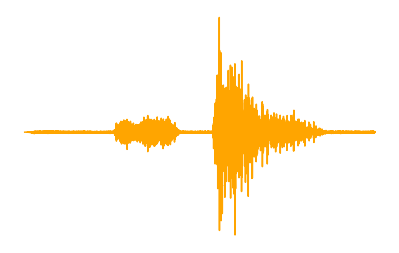

In [ ]:
latexify(columns = 2, fig_height = 4.4)
#plt.plot(sig)
plt.plot(y, c = 'orange')
plt.axis('off')
plt.savefig("low_pass.png", bbox_inches='tight')

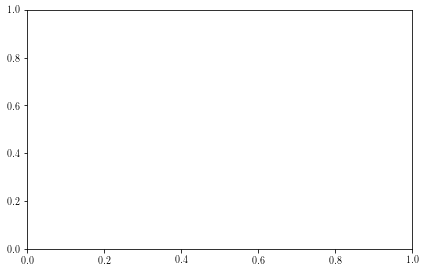

In [ ]:
import matplotlib.animation as animation
from matplotlib import style
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

In [ ]:
ys = np.linspace(0,507840,507840)
def animate(i):
    ax1.clear()
    ax1.plot(sig, ys)

In [ ]:
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

##Fundametal frequency

-0.49999999999999994 0.4999979370724582
19012.523207934843


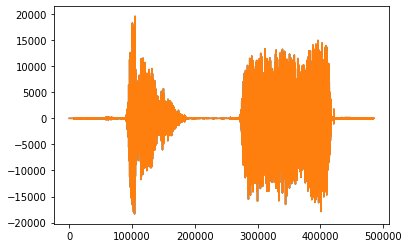

In [ ]:
from scipy.io import wavfile
import scipy.signal as sps
new_rate = 2000
frate, data = wavfile.read('1.wav')
plt.plot(data)
w = np.fft.fft(data)
freqs = np.fft.fftfreq(len(w))
print(freqs.min(), freqs.max())
idx = np.argmax(np.abs(w))
freq = freqs[idx]
freq_in_hertz = abs(freq * frate)
print(freq_in_hertz)

484748


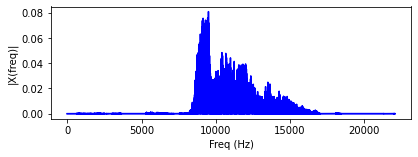

In [ ]:
def frequency_sepectrum(x, sf):
    """
    Derive frequency spectrum of a signal from time domain
    :param x: signal in the time domain
    :param sf: sampling frequency
    :returns frequencies and their content distribution
    """
    x = x - np.average(x)  # zero-centering

    n = len(x)
    print(n)
    k = np.arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # two sides frequency range

    frqarr = frqarr[range(n // 2)]  # one side frequency range

    x = np.fft.fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]

    return frqarr, abs(x)

frq, X = frequency_sepectrum(data, 44100)

plt.subplot(2, 1, 2)
plt.plot(frq, X, 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')
plt.tight_layout()

In [ ]:
a = np.absolute(frq)
a = max(a)
a

22049.909024895413

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

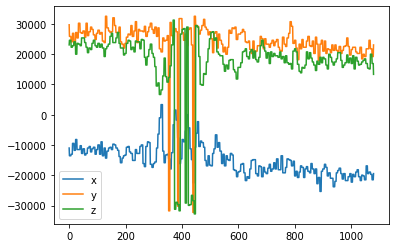

In [ ]:
df = pd.read_csv('j4.csv').dropna()
df.columns = ['x', 'y', 'z']
df.plot()

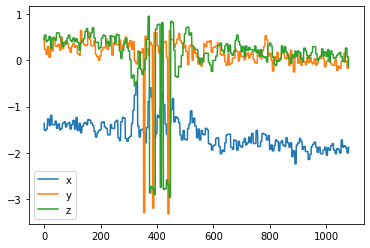

In [ ]:
df['x'] = (df['x']*0.000061)
df['x'] = df['x']-0.687115
df['y'] = (df['y']*0.000061)
df['y'] = df['y']-1.343682
df['z'] = (df['z']*0.000061)
df['z'] = df['z']-0.957967
df.plot()